In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
    self.s2 = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    if(self.N>1):
        self.s2 = ((self.N-2)/(self.N-1))*self.s2 + (x-self.mean)*(x-self.mean)/self.N 
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [3]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  mean1 = np.empty(N)
  mean2 = np.empty(N)
  mean3 = np.empty(N)
  var1 = np.empty(N)
  var2 = np.empty(N)
  var3 = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
    mean1[i] = bandits[0].mean
    mean2[i] = bandits[1].mean
    mean3[i] = bandits[2].mean
    var1[i] = bandits[0].s2
    var2[i] = bandits[1].s2
    var3[i] = bandits[2].s2
    
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  allthecrap = [cumulative_average,mean1,mean2,mean3,var1,var2,var3]  
  return allthecrap

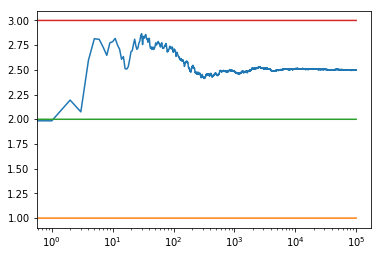

0.9919822643204941
2.0017177682320972
3.003264592841458


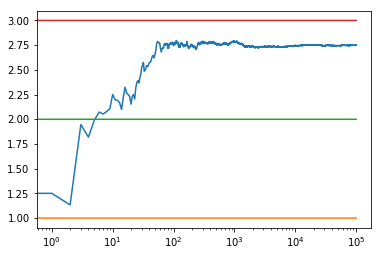

0.9994535074759184
1.9944307886472006
2.997170427985432


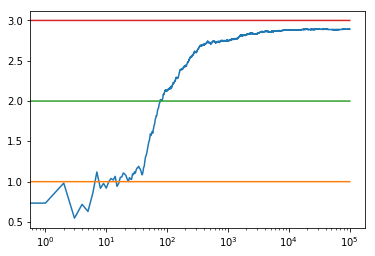

0.979553217830661
1.9968148392656615
2.9947759944800896


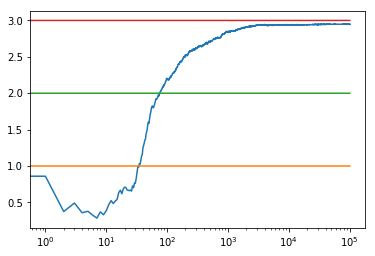

0.9878424462768373
1.9948873831206104
2.9976455558673534


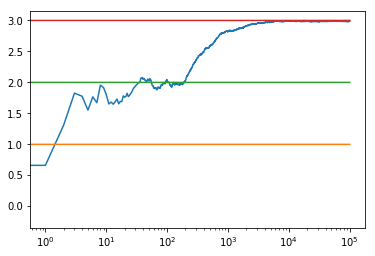

0.8923604652354735
1.9789820876080346
2.997655171474327


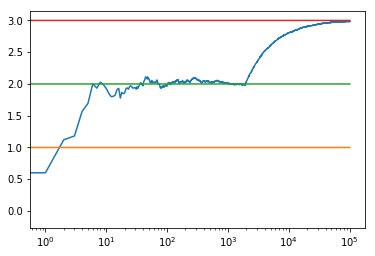

0.7296019252896762
1.9842178645831872
3.0047306343671414


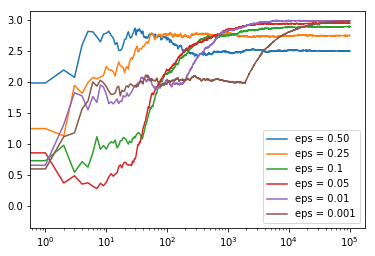

In [4]:
if __name__ == '__main__':
  c_50 = run_experiment(1.0, 2.0, 3.0, 0.50, 100000)
  c_25 = run_experiment(1.0, 2.0, 3.0, 0.25, 100000)  
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)
  c_001 = run_experiment(1.0, 2.0, 3.0, 0.001, 100000)
  
  # log scale plot
  plt.plot(c_50[0], label='eps = 0.50')
  plt.plot(c_25[0], label='eps = 0.25')
  plt.plot(c_1[0], label='eps = 0.1')
  plt.plot(c_05[0], label='eps = 0.05')
  plt.plot(c_01[0], label='eps = 0.01')
  plt.plot(c_001[0], label='eps = 0.001')
  plt.legend()
  plt.xscale('log')
  plt.show()

  #plt.plot(c_1[4], label='eps = 0.1')
  #plt.plot(c_05[4], label='eps = 0.1')
  #plt.plot(c_01[4], label='eps = 0.1')
  #plt.plot(c_001[4], label='eps = 0.1')
  #plt.legend()
  #plt.xscale('log')
  #plt.show()
